**Disclaimer:** The initial statistics used to create the dataframe are gathered from CompuBox which is just a couple of guys sitting ringside that are button mashing when they think they see shots thrown and/or landing.

# Manny Pacquiao Post-US Debut Career Analysis
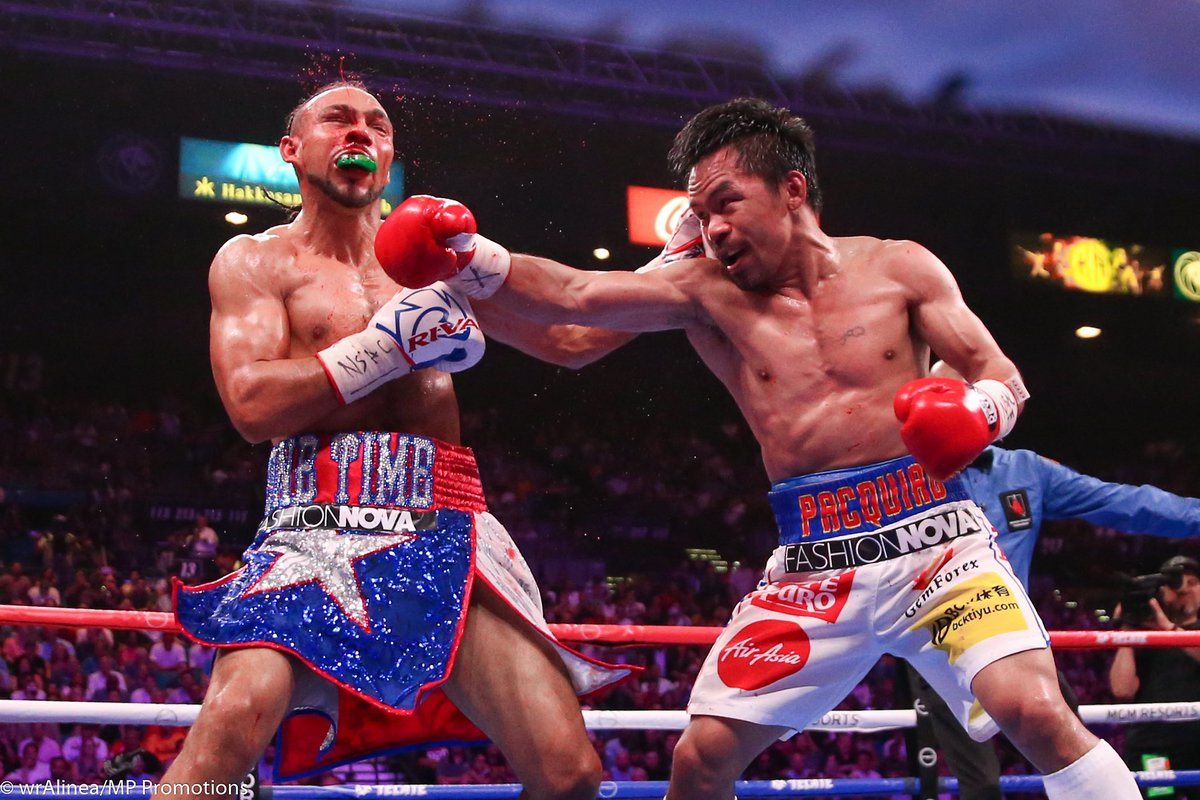

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sbrn
from sklearn import linear_model

In [4]:
df = pd.read_csv('Pacquiao Post US Debut.csv')

In [5]:
df['Height Disadvantage'] = df['Opp. Height'] - df['Pacquiao Height']
df['Weight Disadvantage'] = df['Opp. Weight'] - df['Pacquiao Weight']
df['Reach Disadvantage'] = df['Opp. Reach'] - df['Pacquiao Reach']
print(df)

    Pacquiao Height  Pacquiao Weight  Pacquiao Reach  \
0              65.5              NaN              67   
1              65.5           145.50              67   
2              65.5           146.00              67   
3              65.5           146.00              67   
4              65.5           145.75              67   
5              65.5           144.75              67   
6              65.5           145.50              67   
7              65.5           145.00              67   
8              65.5           143.75              67   
9              65.5           145.00              67   
10             65.5           145.00              67   
11             65.5           147.00              67   
12             65.5           147.00              67   
13             65.5           143.00              67   
14             65.5           145.00              67   
15             65.5           144.50              67   
16             65.5           145.75            

## Averages

In [6]:
print(f"Pacquiao's average weight post his US debut was: {df['Pacquiao Weight'].mean()}")
print(f"The average weight of Pacquiao's opponents post his US debut was: {df['Opp. Weight'].mean()}")
print(f"The average height of Pacquiao's opponents post his US debut was: {df['Opp. Height'].mean()}")
print(f"The average reach of Pacquiao's opponents post his US debut was: {df['Opp. Reach'].mean()}")
print(f"The average height disadvantage Pacquiao faced was: {df['Height Disadvantage'].mean()}")
print(f"The average weight disadvantage Pacquiao faced was: {df['Weight Disadvantage'].mean()}")
print(f"The average reach disadvantage Pacquiao faced was: {df['Reach Disadvantage'].mean()}")

Pacquiao's average weight post his US debut was: 135.72297297297297
The average weight of Pacquiao's opponents post his US debut was: 136.38513513513513
The average height of Pacquiao's opponents post his US debut was: 67.35135135135135
The average reach of Pacquiao's opponents post his US debut was: 69.11428571428571
The average height disadvantage Pacquiao faced was: 1.8513513513513513
The average weight disadvantage Pacquiao faced was: 0.6621621621621622
The average reach disadvantage Pacquiao faced was: 2.1142857142857143


## Maximums

In [7]:
print(f"Pacquiao's highest weight post his US debut was: {df['Pacquiao Weight'].max()}")
print(f"The heaviest a Pacquiao opponent weighed in on fight night was: {df['Opp. Weight'].max()}")
print(f"The tallest opponent Pacquiao faced was {df['Opp. Height'].max()} inches tall.")
print(f"The largest reach of a Pacquiao opponent was: {df['Opp. Reach'].max()}")
print(f"The largest weight disadvantage Pacquiao faced was: {df['Weight Disadvantage'].max()} pounds.")
print(f"The largest height disadvantage Pacquiao faced was: {df['Height Disadvantage'].max()} inches.")
print(f"The largest reach disadvantage Pacquiao faced was: {df['Reach Disadvantage'].max()} inches.")

Pacquiao's highest weight post his US debut was: 147.0
The heaviest a Pacquiao opponent weighed in on fight night was: 150.0
The tallest opponent Pacquiao faced was 71.0 inches tall.
The largest reach of a Pacquiao opponent was: 73.0
The largest weight disadvantage Pacquiao faced was: 5.5 pounds.
The largest height disadvantage Pacquiao faced was: 5.5 inches.
The largest reach disadvantage Pacquiao faced was: 6.0 inches.


Text(0, 0.5, 'Number of Opponents')

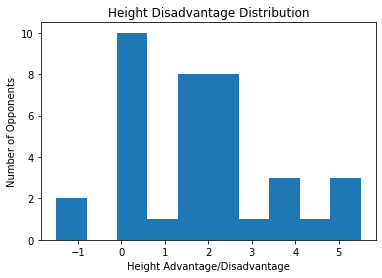

In [65]:
plt.hist(df['Height Disadvantage'])
plt.title('Height Disadvantage Distribution')
plt.xlabel('Height Advantage/Disadvantage')
plt.ylabel('Number of Opponents')

Text(0, 0.5, 'Number of Opponents')

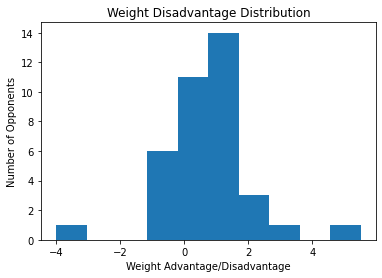

In [67]:
plt.hist(df['Weight Disadvantage'])
plt.title('Weight Disadvantage Distribution')
plt.xlabel('Weight Advantage/Disadvantage')
plt.ylabel('Number of Opponents')

Text(0, 0.5, 'Number of Opponents')

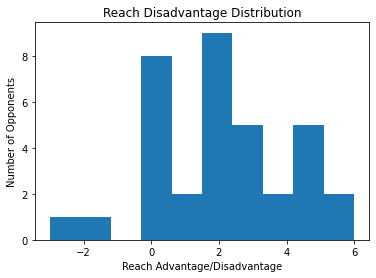

In [68]:
plt.hist(df['Reach Disadvantage'])
plt.title('Reach Disadvantage Distribution')
plt.xlabel('Reach Advantage/Disadvantage')
plt.ylabel('Number of Opponents')

{'United States': 30, 'Malaysia': 1, 'Australia': 1, 'China': 2, 'Philippines': 4}


Text(0, 0.5, 'Number of Fights in Country')

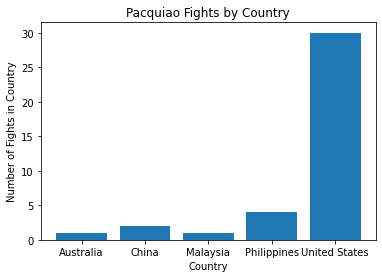

In [9]:
countryCount = {}

for country in df['Country']:
    if country not in countryCount:
        countryCount[country] = 1
    else:
        countryCount[country] += 1

print(countryCount)

lists = sorted(countryCount.items())
x, y = zip(*lists)

plt.bar(x, y)
plt.title('Pacquiao Fights by Country')
plt.xlabel('Country')
plt.ylabel('Number of Fights in Country')

# >>> Use this cell to create a map <<<

In [18]:
pacPunchDF = pd.read_csv('Pac Punch Stats.csv')

"""
Drop the rows with null values from the data frame so the fights that didn't go the distance don't offset the fights that did.
"""

# Pacquiao's Birthday is December 17, 1978.

pacPunchDF = pacPunchDF.dropna()

print(pacPunchDF)

                       Opp.    Year  Opp. Height  Opp. Weight  Opp. Reach  \
0             Keith Thurman  2019.0         67.5       146.50        69.0   
1             Adrien Broner  2019.0         66.0       146.50        69.0   
3                 Jeff Horn  2017.0         69.0       146.25        68.0   
5   Timothy Bradley Jr. III  2016.0         66.0       146.50        69.0   
6      Floyd Mayweather Jr.  2015.0         68.0       146.00        72.0   
7             Chris Algieri  2014.0         70.0       143.50        72.0   
8    Timothy Bradley Jr. II  2014.0         66.0       145.50        69.0   
9              Brandon Rios  2013.0         69.0       146.50        68.0   
11    Timothy Bradley Jr. I  2012.0         66.0       146.00        69.0   
12  Juan Manuel Marquez III  2011.0         67.0       142.00        67.0   
13             Shane Mosley  2011.0         68.5       147.00        71.0   
14        Antonio Margarito  2010.0         71.0       150.00        73.0   

In [29]:
pacPunchDF['Approx. Age'] = pacPunchDF['Year'] - 1978
pacPunchDF['Total Landed'] = pacPunchDF['Landed R1'] + pacPunchDF['Landed R2'] + pacPunchDF['Landed R3'] + pacPunchDF['Landed R4'] + pacPunchDF['Landed R5'] + pacPunchDF['Landed R6'] + pacPunchDF['Landed R7'] + pacPunchDF['Landed R8'] + pacPunchDF['Landed R9'] + pacPunchDF['Landed R10'] + pacPunchDF['Landed R11'] + pacPunchDF['Landed R12']
pacPunchDF['Total Thrown'] = pacPunchDF['Thrown R1'] + pacPunchDF['Thrown R2'] + pacPunchDF['Thrown R3'] + pacPunchDF['Thrown R4'] + pacPunchDF['Thrown R5'] + pacPunchDF['Thrown R6'] + pacPunchDF['Thrown R7'] + pacPunchDF['Thrown R8'] + pacPunchDF['Thrown R9'] + pacPunchDF['Thrown R10'] + pacPunchDF['Thrown R11'] + pacPunchDF['Thrown R12']

In [73]:
# print(pacPunchDF[['Year','Total Thrown']])

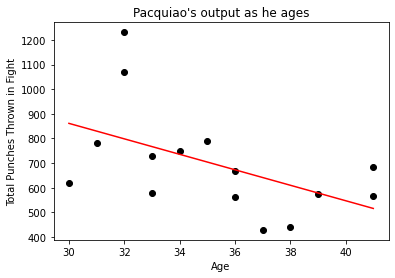

In [62]:
plt.scatter(pacPunchDF['Approx. Age'], 
            pacPunchDF['Total Thrown'], 
            color = 'black')

m, b = np.polyfit(pacPunchDF['Approx. Age'], 
                  pacPunchDF['Total Thrown'], 
                  1)

plt.plot(pacPunchDF['Approx. Age'], 
         m * pacPunchDF['Approx. Age'] + b, 
         color = 'red')

plt.title("Pacquiao's output as he ages")
plt.xlabel('Age')
plt.ylabel('Total Punches Thrown in Fight')

plt.show()

In [69]:
regression4TotalThrown = linear_model.LinearRegression()

regression4TotalThrown.fit(pacPunchDF[['Approx. Age', 
                                       'Opp. Height', 
                                       'Opp. Weight', 
                                       'Opp. Reach']], 
                           pacPunchDF['Total Thrown'])

regression4TotalThrown.coef_

regression4TotalThrown.intercept_

-3181.3855079643704

# Errol "The Truth" Spence Jr. Profile

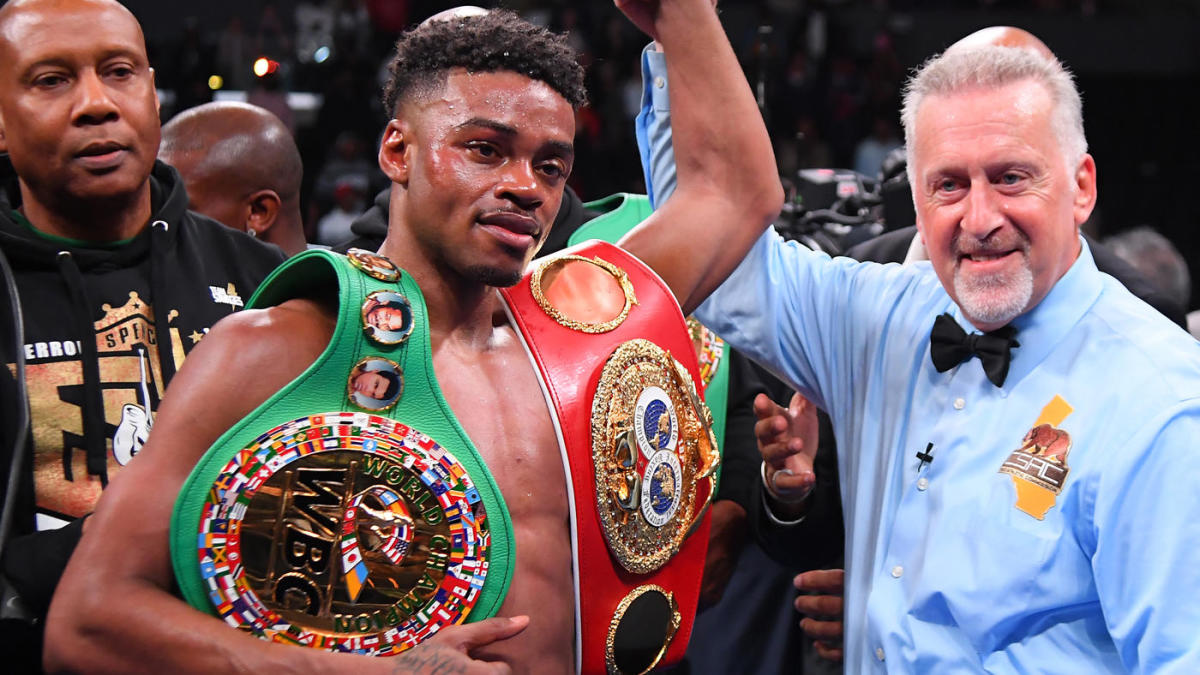

Division: Welterweight (147lbs.)

Bouts: 27

Rounds: 132

KO%: 77.78%

Debut Year: 2012

Current Titles: WBC, IBF

Nickname: "The Truth"

Age: 31

Stance: Southpaw

Height: 5'9 & 1/2" (69.5 inches)

Reach: 72"

Birth Place: Long Island, NY, USA

Residence: DeSoto, TX, USA

In [70]:
regression4TotalThrown.predict([[42, # Pacquiao's approximate age. 
                                 69.5, # Errol Spence's height: 69.50 inches.
                                 147, # Errol Spence's expected weight: 147 pounds.
                                 72]]) # Errol Spence's reach: 72 inches.

array([514.79003539])

# What you clicked for! The predictions:

According to this first iteration of the model;
(considering:
 - Pacquiao's Age,
 - Opponent's Height,
 - Opponent's Expected Weight
 - Opponent's Reach)

Pacquiao will throw ~514 - 515 punches against Errol Spence Jr.